# Default Prediction

Prepare predictive model(s) of default. Default client is defined as one with loan_status variable taking on the following levels:

 - Charged off
 - Default
 - Does not meet the credit policy. Status: Charged Off
 - Late (31-120 days)

#### Importing Libraries and Data

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

#Clients of interest
def_clients = ['Charged Off','Default','Does not meet the credit policy. Status: Charged Off','Late (31-120 days)']

#### Reading data from database

In [2]:
# To speed up calculation - sample is takem from whole DB
n_obs = 10 ** 4

#-------- !!!    ------#
#  To use the whole dataset, make sure to remove ' LIMIT ' + str(n_obs)' from query
#-------- !!!    ------#

db = 'database.sqlite'
#query_Def = 'SELECT * FROM loan WHERE loan_status in (\'Charged Off\',\'Default\',\'Does not meet the credit policy. Status: Charged Off\',\'Late (31-120 days)\') LIMIT 1000'
query = 'SELECT * FROM loan ORDER BY RANDOM() LIMIT ' + str(n_obs)

conn = sql.connect(db)
df = pd.read_sql_query(query,conn)

#### Data Preprocessing

In [3]:
# UDFs:
def DefClient(x):
    if x in def_clients:
        return 1
    return 0

In [4]:
# Replace all empty strings with np.nan
df1 = df.replace('',np.nan)
df = df1
del df1

# Convert to proper datatype if possible
for col in df.columns:
    try:
        df[col] = df[col].astype(int)
    except:
        try:
            df[col] = df[col].astype(float)
        except:
            df[col] = df[col].astype(str)
    

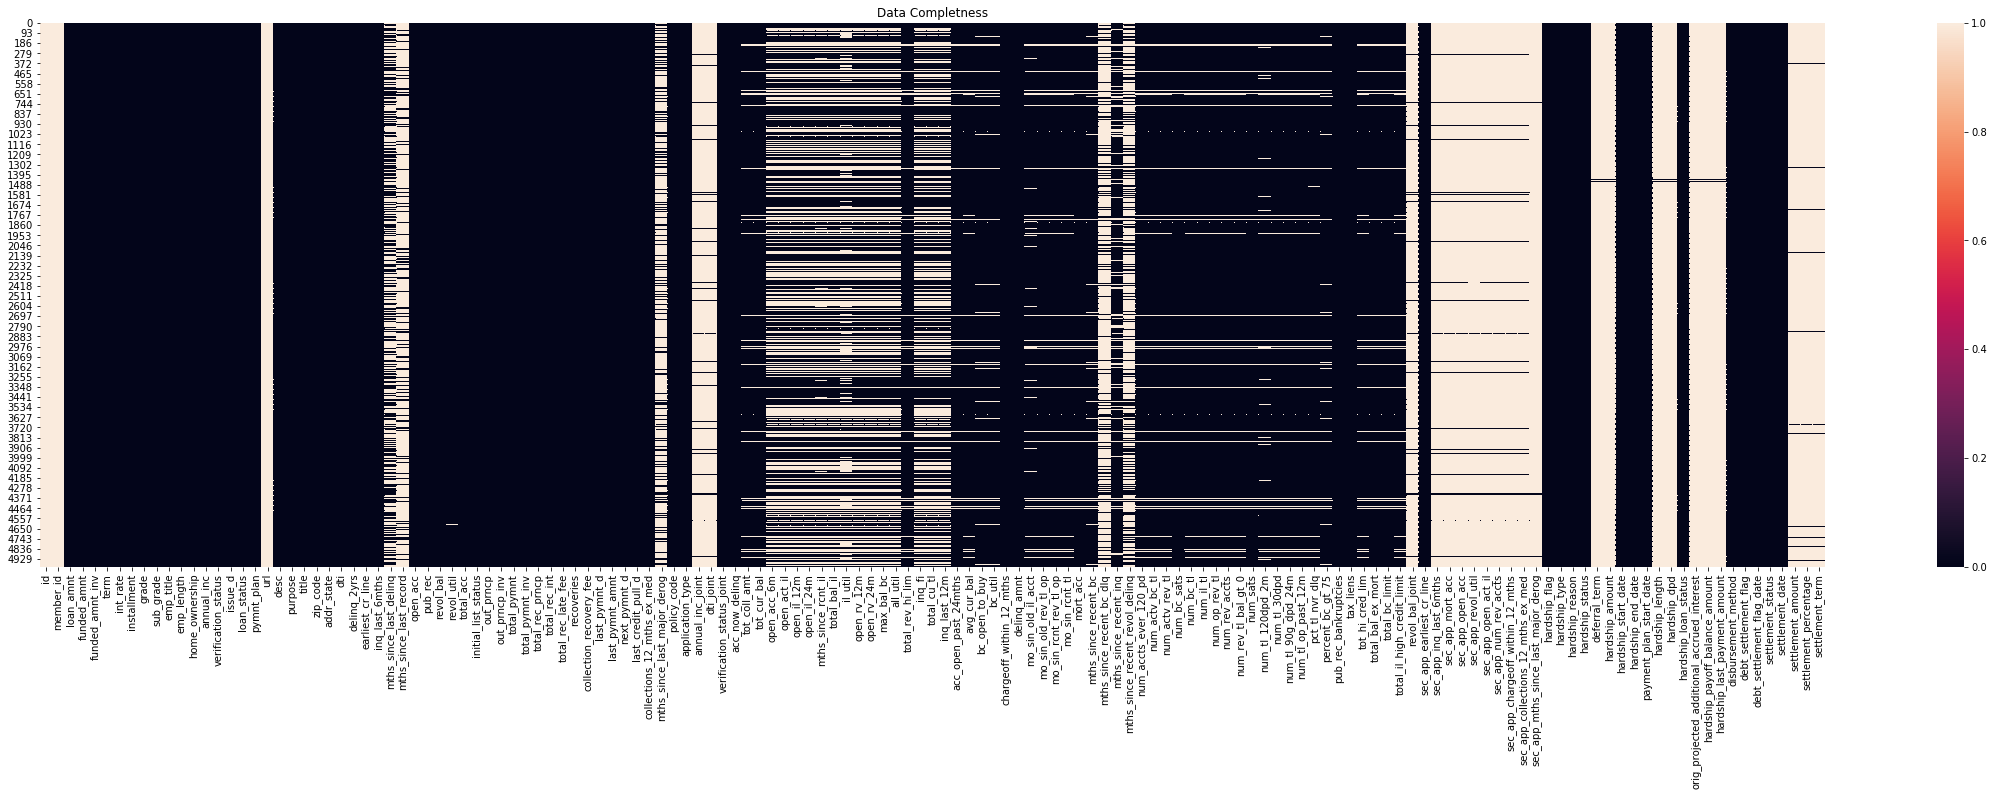

In [5]:
# Check data completness
plt.figure(figsize=(40,10))
plt.title('Data Completness')
sns.heatmap(df.isna())

In [7]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12900,12900,12900.0,60 months,30.79,423.65,G,G1,accounts rep,10+ years,MORTGAGE,38000.0,Source Verified,May-2017,Current,n,NaN,nan,home_improvement,Home improvement,335xx,FL,34.02,1,Jun-1999,0,11.0,NaN,19,0,10033,26.1,29,f,10370.9,10370.9,8852.52,8852.52,2529.1,6323.42,0.0,0.0,0.0,Feb-2019,423.65,Mar-2019,Feb-2019,0,NaN,1,Individual,NaN,NaN,nan,0,0.0,96599.0,1.0,2.0,1.0,4.0,11.0,34667.0,85.0,2.0,4.0,5418.0,56.0,38500.0,1.0,0.0,1.0,8.0,5367.0,17118.0,33.4,0,0,133.0,215.0,3.0,3.0,3.0,8.0,NaN,11.0,NaN,0.0,5.0,8.0,8.0,9.0,6.0,16.0,20.0,8.0,19.0,0.0,0.0,0.0,3.0,82.8,12.5,0.0,0,154240.0,44700.0,25700.0,40690.0,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,nan,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,nan,NaN,NaN,NaN,Cash,N,nan,nan,nan,NaN,NaN,NaN


### Data Cleaning

In [8]:
# Remove columns with 70% of missing data
Nulls = df.isnull().sum(axis=0).sort_values(ascending = False)/float(len(df))
Nulls = Nulls[Nulls>0.7]
df.drop(Nulls.index,axis=1,inplace=True)
df.shape

(5000, 117)

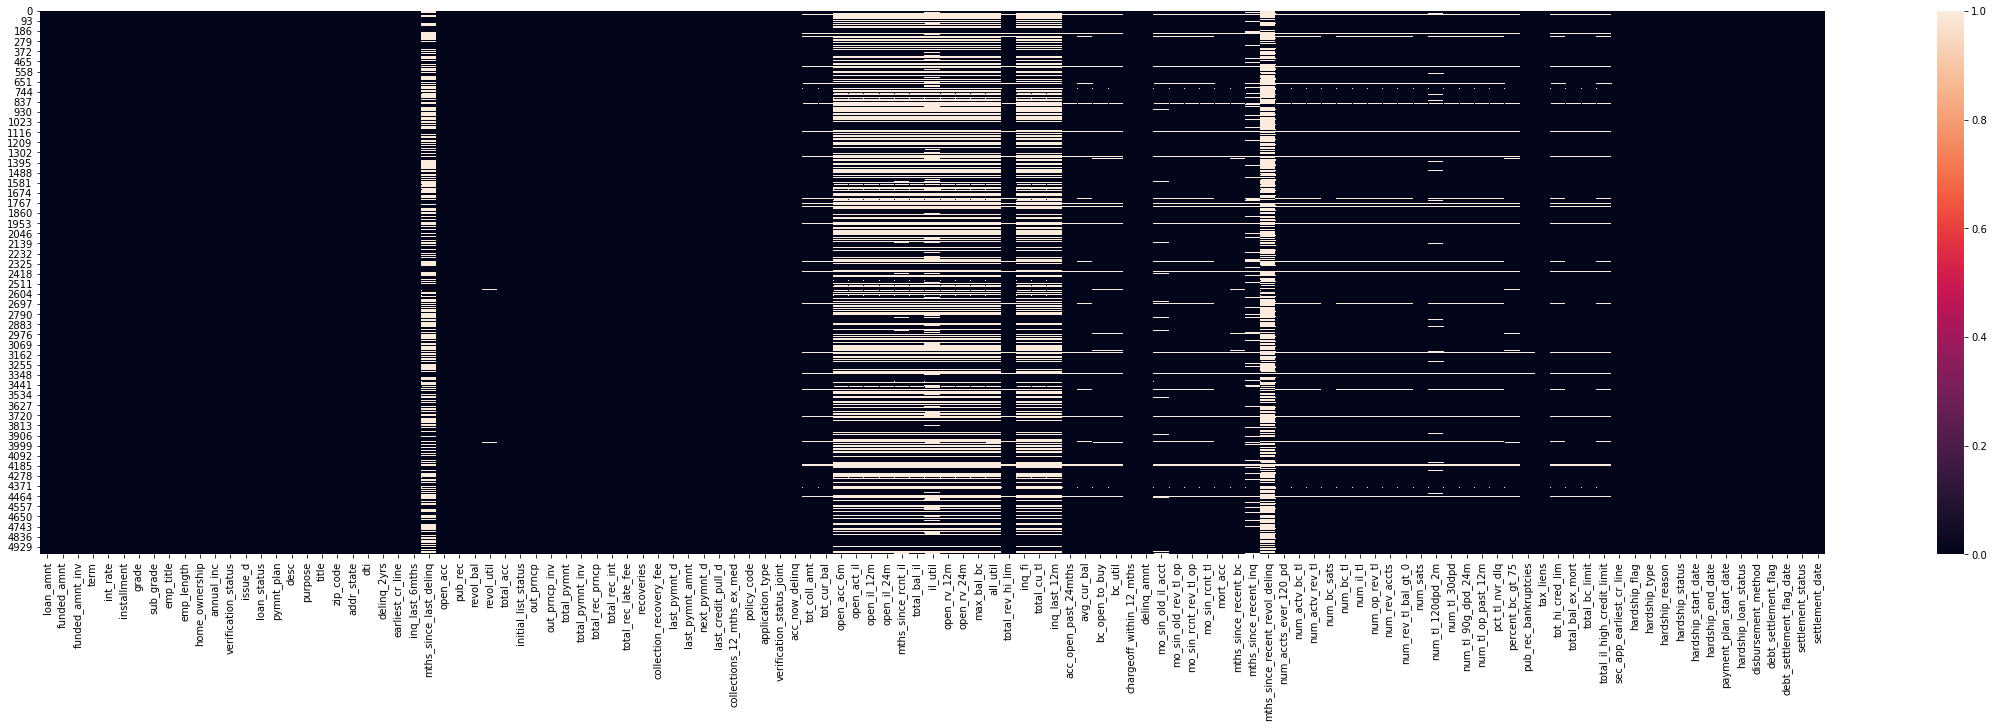

In [9]:
# Check data completness
plt.figure(figsize=(40,10))
sns.heatmap(df.isna())

In [10]:
# Create a feature that characterize Default Client
df['defClient'] = df['loan_status'].apply(DefClient)
df = df.drop('loan_status',axis=1)

# Assumption: borrowers are treated equeally across whole country
df = df.drop(['addr_state','zip_code'],axis=1)

# Extract number of years
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)

In [11]:
#Split Data into 4 subframes:
# - Numerical features
df_n = df.select_dtypes(exclude='object')

# - Categorical
df_c = df.select_dtypes(include='object')

# - Dates
date_col = ['sec_app_earliest_cr_line','earliest_cr_line']
df_d = df_c.filter(like='_d',axis=1)
df_d[date_col] = df_c[date_col]

df_c = df_c.drop(df_c.filter(like='_d',axis=1).columns,axis=1)
df_c = df_c.drop(date_col,axis=1)

# - Text
#Count number of categories per feature (Categorized <40, Text >40)
categ = []
for col in df_c.columns:
    categ.append([col,len(df_c[col].unique())])
categ = pd.DataFrame(categ).sort_values(by=1, ascending=False)

text_colns = categ[categ[1]>40].loc[:,0]
df_t = df_c[text_colns]
df_c = df_c.drop(text_colns,axis=1)

del df

C:\Users\User\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [12]:
df_d.head(1)

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,hardship_start_date,hardship_end_date,payment_plan_start_date,debt_settlement_flag_date,settlement_date,sec_app_earliest_cr_line,earliest_cr_line
0,May-2017,Feb-2019,Mar-2019,Feb-2019,nan,nan,nan,nan,nan,nan,Jun-1999


In [13]:
# Create variable: days since first credit line
df_d['today'] = pd.to_datetime(date.today())
df_d['since_ecl'] = df_d['today'] - pd.to_datetime(df_d['earliest_cr_line'])
df_d['since_ecl'] = df_d['since_ecl'].apply(lambda x: float(x.days))

# Create variable: days since last payment to last loan payment
df_d['tto_last_pmnt'] = (pd.to_datetime(df_d['last_credit_pull_d']) - pd.to_datetime(df_d['last_pymnt_d']))
df_d['tto_last_pmnt'] = df_d['tto_last_pmnt'].apply(lambda x: float(x.days))

df_n = pd.concat([df_n, df_d[['since_ecl','tto_last_pmnt']]],axis=1)

In [14]:
df_n.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,defClient,since_ecl,tto_last_pmnt
0,12900,12900,12900.0,30.79,423.65,10.0,38000.0,34.02,1,0,11.0,19,0,10033,26.1,29,10370.9,10370.9,8852.52,8852.52,2529.1,6323.42,0.0,0.0,0.0,423.65,0,1,0,0.0,96599.0,1.0,2.0,1.0,4.0,11.0,34667.0,85.0,2.0,4.0,5418.0,56.0,38500.0,1.0,0.0,1.0,8.0,5367.0,17118.0,33.4,0,0,133.0,215.0,3.0,3.0,3.0,8.0,11.0,NaN,0.0,5.0,8.0,8.0,9.0,6.0,16.0,20.0,8.0,19.0,0.0,0.0,0.0,3.0,82.8,12.5,0.0,0,154240.0,44700.0,25700.0,40690.0,0,7363.0,0.0


### Filling missing values and creation of dummies

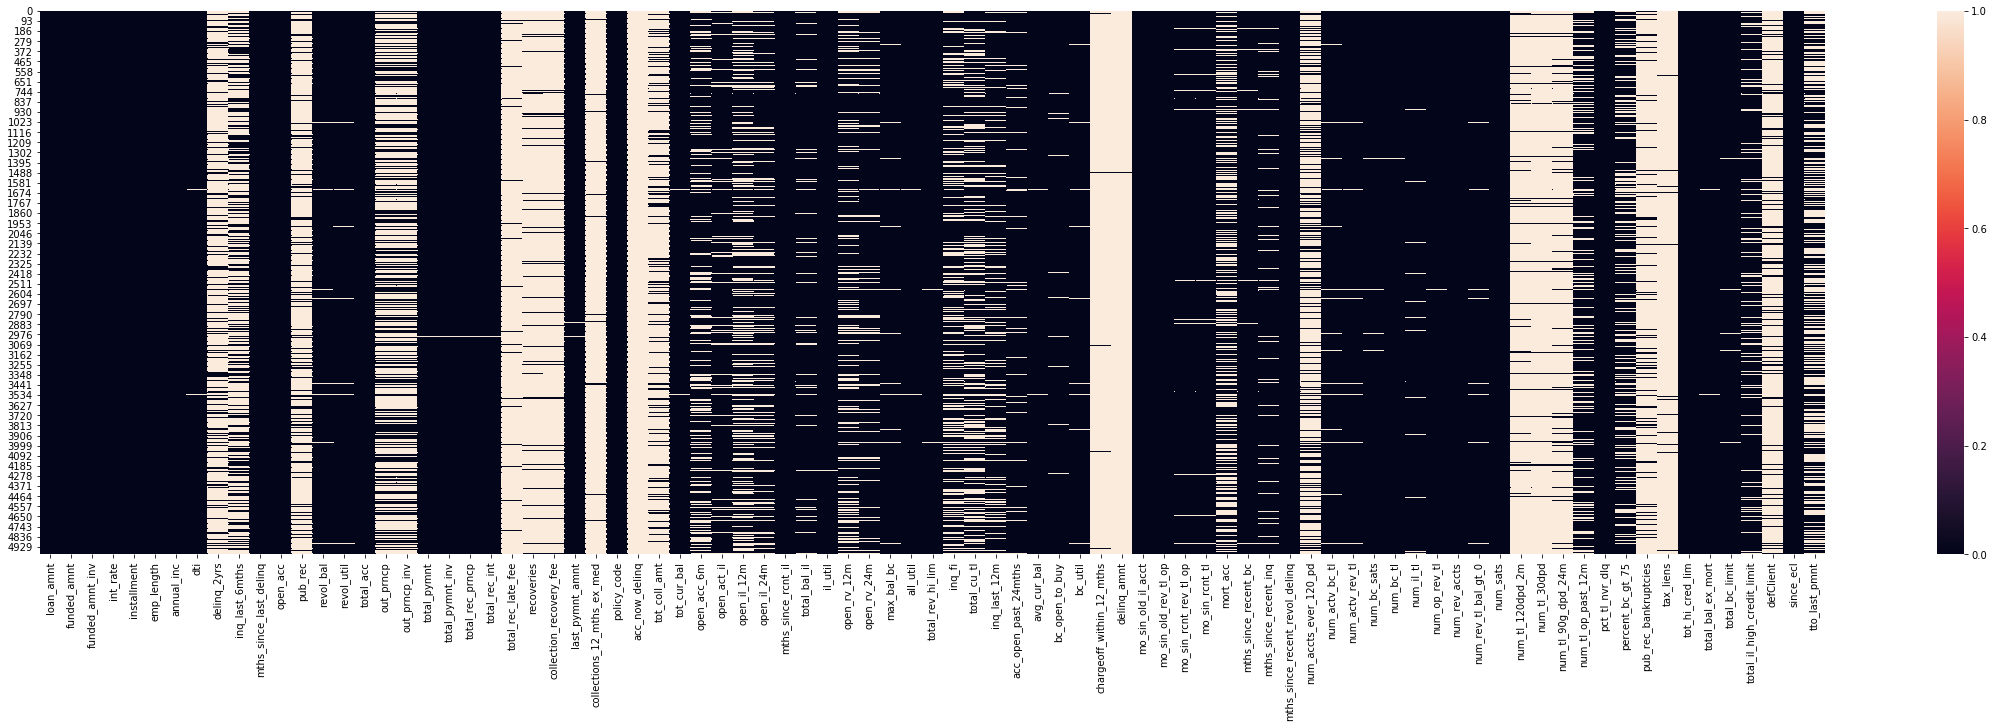

In [15]:
# Check data completness
plt.figure(figsize=(40,10))
sns.heatmap(df_n == 0)

In [16]:
#Remove variables with 90% zeros
zeros = pd.DataFrame((df_n[df_n==0].count(axis=0)/len(df_n)).sort_values(ascending=False))
zeros = zeros[zeros[0]>0.9].index
df_n = df_n.drop(zeros,axis=1)

In [17]:
# fill missing data for numerical part
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median',axis=0)
imp.fit(df_n)
df_n = pd.DataFrame(data=imp.transform(df_n), columns=df_n.columns)

C:\Users\User\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
df_n.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,policy_code,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,defClient,since_ecl,tto_last_pmnt
0,12900.0,12900.0,12900.0,30.79,423.65,10.0,38000.0,34.02,1.0,0.0,11.0,19.0,0.0,10033.0,26.1,29.0,10370.9,10370.9,8852.52,8852.52,2529.1,6323.42,423.65,1.0,0.0,96599.0,1.0,2.0,1.0,4.0,11.0,34667.0,85.0,2.0,4.0,5418.0,56.0,38500.0,1.0,0.0,1.0,8.0,5367.0,17118.0,33.4,133.0,215.0,3.0,3.0,3.0,8.0,11.0,33.0,0.0,5.0,8.0,8.0,9.0,6.0,16.0,20.0,8.0,19.0,3.0,82.8,12.5,0.0,154240.0,44700.0,25700.0,40690.0,0.0,7363.0,0.0


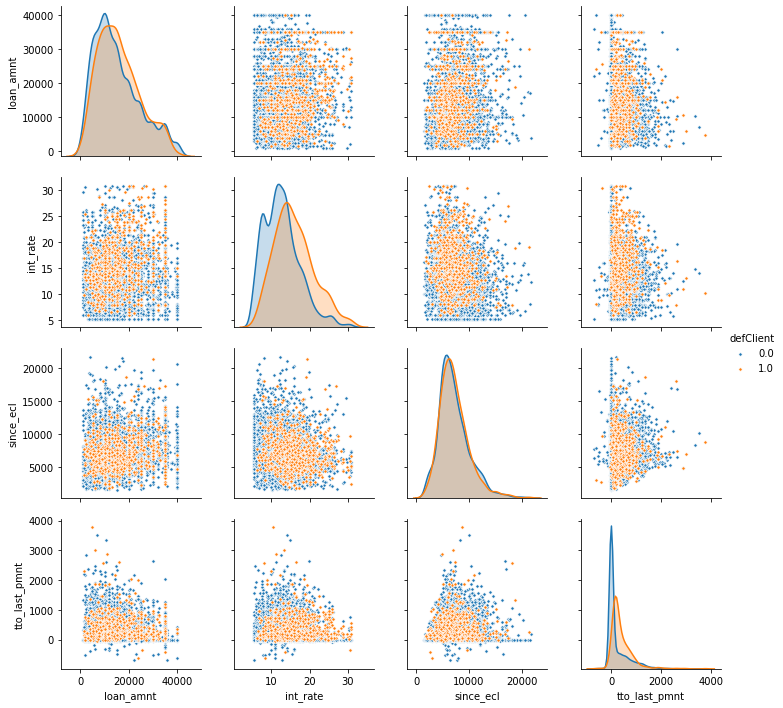

In [20]:
#Data Exploration
sns.pairplot(df_n, hue = 'defClient', vars=['loan_amnt','int_rate','since_ecl','tto_last_pmnt'],plot_kws={"s": 11})

In [21]:
df_n.shape

(5000, 74)

In [22]:
#Dummies
categ = []
for col in df_c.columns:
    categ.append([col,len(df_c[col].unique())])
categ = pd.DataFrame(categ).sort_values(by=1, ascending=False)
categ

#Process all variables with 2+ categories
text_colns = categ[categ[1]>2].loc[:,0]
df_dum = pd.get_dummies(df_c[text_colns])

text_colns = categ[categ[1]<3].loc[:,0]
df_dum = pd.concat([df_dum,pd.get_dummies(df_c[text_colns],drop_first=True)],axis=1)
#df_dum.shape

In [23]:
# Remove all dummmy craeted on _NaN
df_nan = df_dum.filter(like='_nan',axis=1).columns
df_dum.drop(df_nan, axis=1, inplace=True)

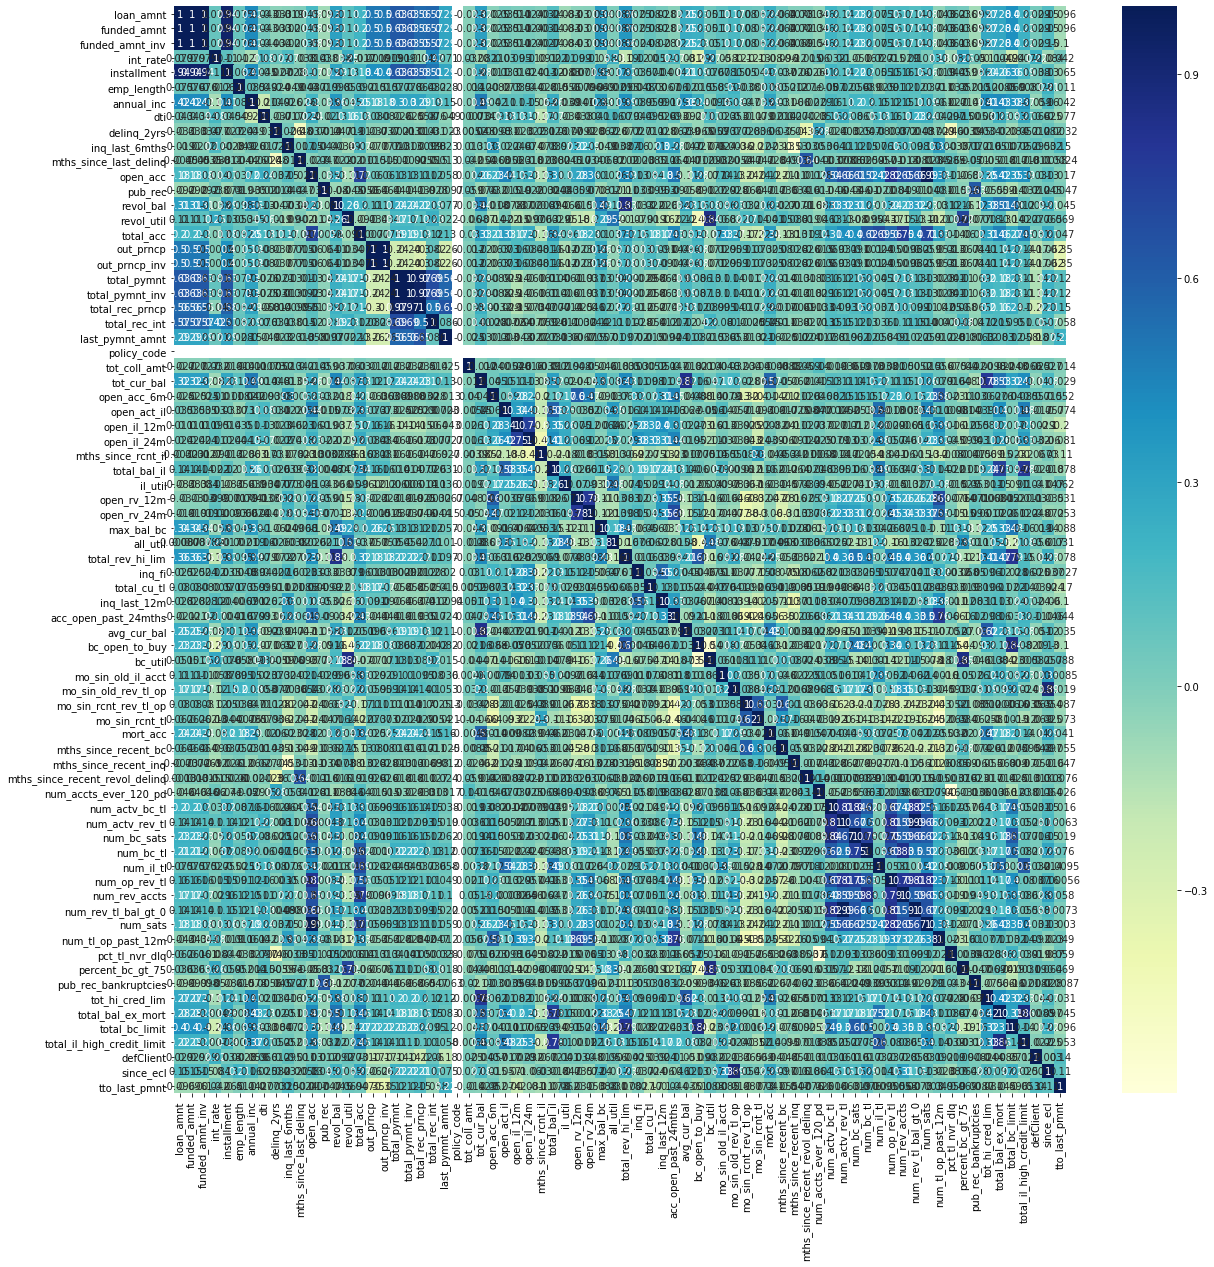

In [24]:
# Review correlation between variables and remove the most correlated
plt.figure(figsize=(20,20))
sns.heatmap(df_n.corr(),annot=True, cmap="YlGnBu")

In [25]:
# Remove highly correlated and logically unecceary variables
df_n = df_n.drop(['policy_code','funded_amnt','funded_amnt_inv','out_prncp_inv','total_pymnt_inv','total_rec_prncp'],axis=1)

### Model Testing and Training

In [84]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

stats = []

In [27]:
df_dum.head(1)

,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,hardship_reason_DISABILITY,hardship_reason_EXCESSIVE_OBLIGATIONS,hardship_reason_INCOME_CURTAILMENT,hardship_reason_MEDICAL,hardship_reason_NATURAL_DISASTER,hardship_reason_REDUCED_HOURS,hardship_reason_UNEMPLOYMENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,hardship_loan_status_Current,hardship_loan_status_In Grace Period,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days),verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,hardship_status_ACTIVE,hardship_status_BROKEN,hardship_status_COMPLETED,settlement_status_ACTIVE,settlement_status_BROKEN,settlement_status_COMPLETE,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_Joint App,initial_list_status_w,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y,term_ 60 months
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [36]:
df_x = pd.DataFrame(preprocessing.scale(df_n.drop('defClient',axis=1),axis=1))
df_x = pd.concat([df_x, df_dum.filter(regex='^grade',axis=1),
                        df_dum.filter(regex='^purpose',axis=1),
                        df_dum.filter(regex='^verification',axis=1)], axis=1)
X = df_x
y = df_n['defClient']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)


In [85]:
x_train.shape

(3500, 94)

### Logistick regression

C:\Users\User\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1334
         1.0       1.00      0.66      0.79       166

    accuracy                           0.96      1500
   macro avg       0.98      0.83      0.89      1500
weighted avg       0.96      0.96      0.96      1500



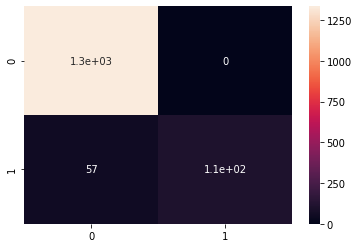

In [86]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

%matplotlib inline

y_predict = clf.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(clf).__name__,
             metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])

#### Random Forest

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1334
         1.0       0.97      0.42      0.58       166

    accuracy                           0.93      1500
   macro avg       0.95      0.71      0.77      1500
weighted avg       0.94      0.93      0.92      1500



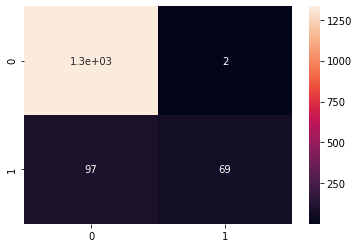

In [87]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200,criterion='entropy',n_jobs=-1)
clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(clf).__name__,
             metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])

In [88]:
#clf.feature_importances_

#### SVM - SVC - model

C:\Users\User\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1334
         1.0       1.00      0.13      0.23       166

    accuracy                           0.90      1500
   macro avg       0.95      0.57      0.59      1500
weighted avg       0.91      0.90      0.87      1500



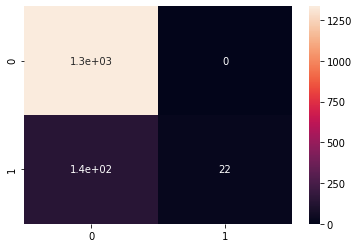

In [89]:
from sklearn.svm import SVC

clf = SVC(probability=True)
clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(clf).__name__,
             metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])

#### Gradient Boosting

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1334
         1.0       0.99      0.75      0.86       166

    accuracy                           0.97      1500
   macro avg       0.98      0.88      0.92      1500
weighted avg       0.97      0.97      0.97      1500



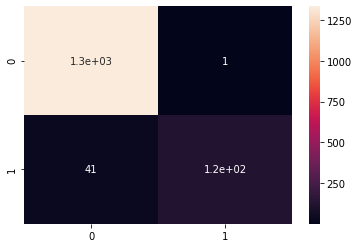

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=200, max_depth=7, max_features=0.5)
clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(clf).__name__,
             metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])

#### Neural Network

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1334
         1.0       1.00      0.78      0.88       166

    accuracy                           0.98      1500
   macro avg       0.99      0.89      0.93      1500
weighted avg       0.98      0.98      0.97      1500



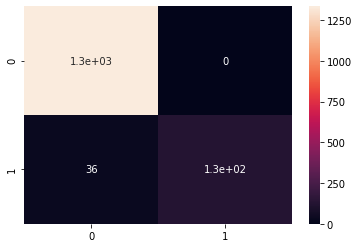

In [91]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(20,15,10),max_iter=200)
clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(clf).__name__,
             metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])

### XGBoost

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1334
         1.0       0.99      0.73      0.84       166

    accuracy                           0.97      1500
   macro avg       0.98      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500



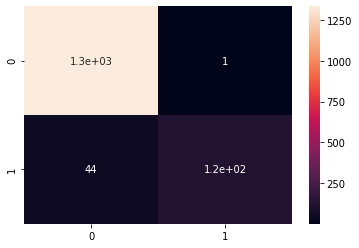

In [92]:
import xgboost as xgb

clf = xgb.XGBClassifier(seed=42, nthread=-1)
clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(clf).__name__,
             metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])

### Models Comparison

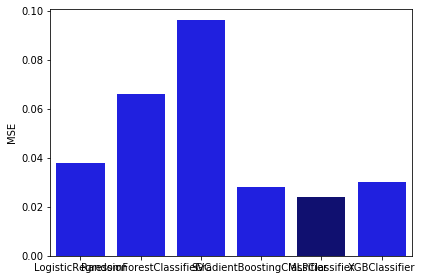

,Accuracy,AUC_ROC,MSE,Recall
LogisticRegression,0.962,0.950778,0.038,0.656627
RandomForestClassifier,0.934,0.938867,0.066,0.415663
SVC,0.904,0.951825,0.096,0.132530
GradientBoostingClassifier,0.972,0.968489,0.028,0.753012
MLPClassifier,0.976,0.951979,0.024,0.783133
XGBClassifier,0.970,0.960532,0.030,0.734940


In [94]:
#Mean Square Error
st = pd.DataFrame([[x[0],x[2],x[3],x[4],x[5]] for x in stats])
st.set_index(0,drop=True,inplace=True)
st.columns = ['Accuracy','AUC_ROC','MSE','Recall']
clrs = ['blue' if (x < max(st.iloc[:,0])) else 'navy' for x in st.iloc[:,0] ]
del st.index.name

sns.barplot(x=st.index, y = st.iloc[:,2],palette=clrs)
plt.tight_layout()
plt.show()

st

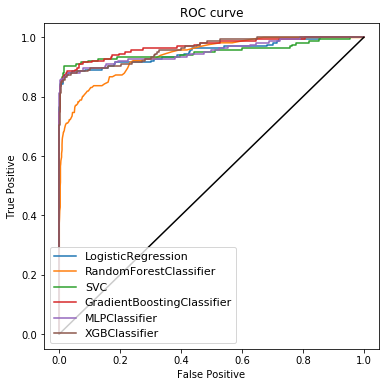

In [95]:
plt.figure(1, figsize=(6,6))
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
for x in stats:
    fpr, tpr, tresh = x[1]
    plt.plot(fpr, tpr, label = x[0] )
plt.legend(loc=3, prop={'size':11})
plt.plot([0,1],[0,1], color = 'black')
plt.show()

### PCA

In [173]:
from sklearn.decomposition import PCA
pca_d = PCA(n_components=50)

stats = []

df_x = pd.DataFrame(preprocessing.scale(df_n.drop('defClient',axis=1),axis=1))
df_x = pd.concat([df_x, df_dum.filter(regex='^grade',axis=1),
                        df_dum.filter(regex='^purpose',axis=1),
                        df_dum.filter(regex='^verification',axis=1)], axis=1)

X = df_x
y = df_n['defClient']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [139]:
# Transform and fit training set
x_pca = pd.DataFrame(pca_d.fit_transform(x_train.filter(regex='(?:\d+\+?)+',axis=1)))
x_pca.index = x_train.index
x_train = pd.concat([x_pca, x_train.drop(x_train.filter(regex='(?:\d+\+?)+',axis=1).columns,axis=1)],axis=1)

# Transform test set
x_pca = pd.DataFrame(pca_d.transform(x_test.filter(regex='(?:\d+\+?)+',axis=1)))
x_pca.index = x_test.index
x_test = pd.concat([x_pca, x_test.drop(x_test.filter(regex='(?:\d+\+?)+',axis=1).columns,axis=1)],axis=1)

### MLPClassifier

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1312
         1.0       0.93      0.80      0.86       188

    accuracy                           0.97      1500
   macro avg       0.95      0.90      0.92      1500
weighted avg       0.97      0.97      0.97      1500



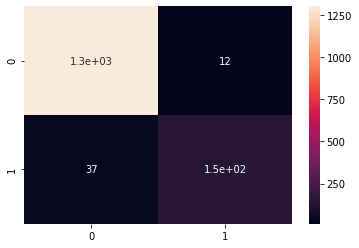

In [140]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(40,20,10),max_iter=200)
clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(clf).__name__ + ' PCA',
             metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])

### XGBoost

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1312
         1.0       0.99      0.79      0.88       188

    accuracy                           0.97      1500
   macro avg       0.98      0.89      0.93      1500
weighted avg       0.97      0.97      0.97      1500



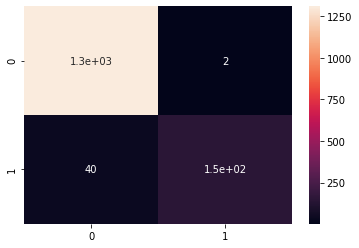

In [141]:
import xgboost as xgb

clf = xgb.XGBClassifier(seed=42, nthread=-1)
clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(clf).__name__ + ' PCA',
             metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])

### SVM with GridSearch

C:\Users\User\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.1min finished


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1312
         1.0       0.99      0.75      0.85       188

    accuracy                           0.97      1500
   macro avg       0.98      0.87      0.92      1500
weighted avg       0.97      0.97      0.97      1500



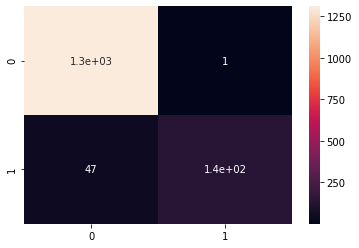

In [142]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=4, n_jobs=-1)

grid.fit(x_train,y_train)

y_predict = grid.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(grid).__name__ + ' PCA',
             metrics.roc_curve(y_test,grid.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,grid.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])


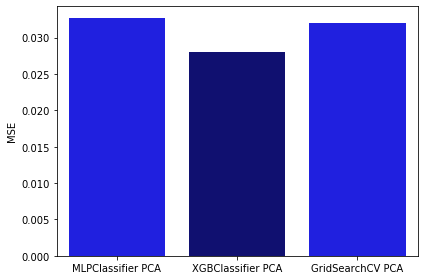

,Accuracy,AUC_ROC,MSE,Recall
MLPClassifier PCA,0.967333,0.947656,0.032667,0.803191
XGBClassifier PCA,0.972000,0.943719,0.028000,0.787234
GridSearchCV PCA,0.968000,0.942568,0.032000,0.750000


In [143]:
#Mean Square Error
st = pd.DataFrame([[x[0],x[2],x[3],x[4],x[5]] for x in stats])
st.set_index(0,drop=True,inplace=True)
st.columns = ['Accuracy','AUC_ROC','MSE','Recall']
clrs = ['blue' if (x < max(st.iloc[:,0])) else 'navy' for x in st.iloc[:,0] ]
del st.index.name

sns.barplot(x=st.index, y = st.iloc[:,2],palette=clrs)
plt.tight_layout()
plt.show()

st

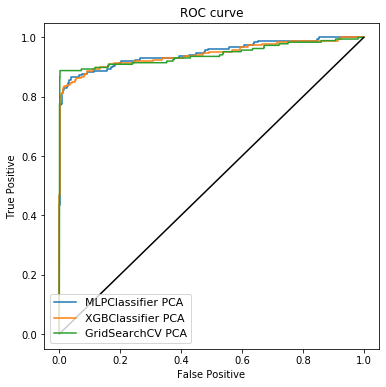

In [144]:
plt.figure(1, figsize=(6,6))
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
for x in stats:
    fpr, tpr, tresh = x[1]
    plt.plot(fpr, tpr, label = x[0] )
plt.legend(loc=3, prop={'size':11})
plt.plot([0,1],[0,1], color = 'black')
plt.show()

### NLP

In [179]:
x_train.shape

(3500, 78)

In [175]:
#df_x = df_n.drop('defClient',axis=1)
#df_x = pd.DataFrame(preprocessing.scale(df_x,axis=1))
#df_x = pd.concat([df_x, df_t['emp_title']], axis=1)
X = pd.concat([X,df_t['emp_title']],axis=1)
y = df_n['defClient']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [177]:
# PCA
# Transform and fit training set
x_pca = pd.DataFrame(pca_d.fit_transform(x_train.filter(regex='(?:\d+\+?)+',axis=1)))
x_pca.index = x_train.index
x_train = pd.concat([x_pca, x_train.drop(x_train.filter(regex='(?:\d+\+?)+',axis=1).columns,axis=1)],axis=1)

# Transform test set
x_pca = pd.DataFrame(pca_d.transform(x_test.filter(regex='(?:\d+\+?)+',axis=1)))
x_pca.index = x_test.index
x_test = pd.concat([x_pca, x_test.drop(x_test.filter(regex='(?:\d+\+?)+',axis=1).columns,axis=1)],axis=1)

In [180]:
# NLP
#Vectorization for text features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vect = vectorizer.fit_transform(x_train['emp_title'])

vect = pd.DataFrame(vect.toarray())
vect.index = x_train.index
x_train = pd.concat([x_train.drop('emp_title',axis=1),vect],axis=1)

vect = vectorizer.transform(x_test['emp_title'])
vect = pd.DataFrame(vect.toarray())
vect.index = x_test.index
x_test = pd.concat([x_test.drop('emp_title',axis=1),vect],axis=1)

In [181]:
x_test.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,

### MLPClassifier

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1301
         1.0       0.82      0.59      0.69       199

    accuracy                           0.93      1500
   macro avg       0.88      0.78      0.82      1500
weighted avg       0.92      0.93      0.92      1500



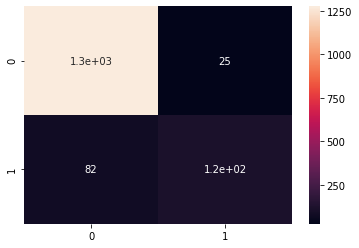

In [182]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,50,10),max_iter=200)
clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(clf).__name__ + ' PCA + NLP',
             metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])

### XGBoost

In [199]:
x_train.columns = range(0,len(x_train.columns))
x_test.columns = range(0,len(x_test.columns))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1301
         1.0       0.99      0.84      0.91       199

    accuracy                           0.98      1500
   macro avg       0.99      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500



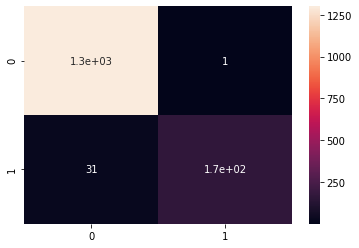

In [201]:
import xgboost as xgb

clf = xgb.XGBClassifier(seed=42, nthread=-1)
clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(clf).__name__ + ' PCA + NLP',
             metrics.roc_curve(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])

### SVM with GridSearch

C:\Users\User\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 13.3min finished


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1301
         1.0       0.97      0.77      0.86       199

    accuracy                           0.97      1500
   macro avg       0.97      0.88      0.92      1500
weighted avg       0.97      0.97      0.96      1500



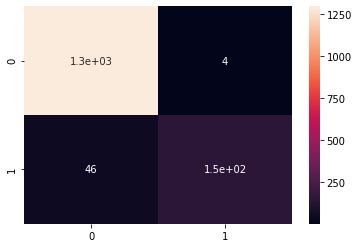

In [202]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=4, n_jobs=-1)

grid.fit(x_train,y_train)

y_predict = grid.predict(x_test)

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

print(metrics.classification_report(y_test,y_predict))

stats.append([type(grid).__name__ + ' PCA + NLP',
             metrics.roc_curve(y_test,grid.predict_proba(x_test)[:,1]),
             metrics.accuracy_score(y_test,y_predict),
             metrics.roc_auc_score(y_test,grid.predict_proba(x_test)[:,1]),
             metrics.mean_squared_error(y_test,y_predict),
             metrics.recall_score(y_test,y_predict)])


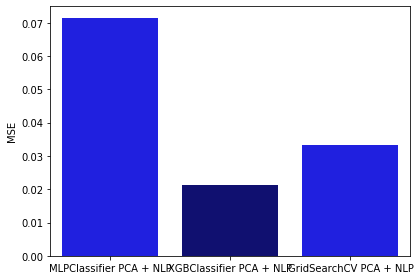

,Accuracy,AUC_ROC,MSE,Recall
MLPClassifier PCA + NLP,0.928667,0.896547,0.071333,0.587940
XGBClassifier PCA + NLP,0.978667,0.974932,0.021333,0.844221
GridSearchCV PCA + NLP,0.966667,0.968022,0.033333,0.768844


In [203]:
#Mean Square Error
st = pd.DataFrame([[x[0],x[2],x[3],x[4],x[5]] for x in stats])
st.set_index(0,drop=True,inplace=True)
st.columns = ['Accuracy','AUC_ROC','MSE','Recall']
clrs = ['blue' if (x < max(st.iloc[:,0])) else 'navy' for x in st.iloc[:,0] ]
del st.index.name

sns.barplot(x=st.index, y = st.iloc[:,2],palette=clrs)
plt.tight_layout()
plt.show()

st

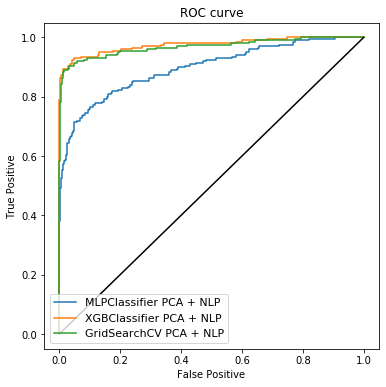

In [204]:
#ploting ROC
plt.figure(1, figsize=(6,6))
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
for x in stats:
    fpr, tpr, tresh = x[1]
    plt.plot(fpr, tpr, label = x[0] )
plt.legend(loc=3, prop={'size':11})
plt.plot([0,1],[0,1], color = 'black')
plt.show()

(array([1315.,   11.,    3.,    2.,    3.,    4.,   11.,  151.]),
 array([0.00127746, 0.12603213, 0.25078678, 0.37554145, 0.5002961 ,
        0.6250508 , 0.74980545, 0.8745601 , 0.9993148 ], dtype=float32),
 <a list of 8 Patch objects>)

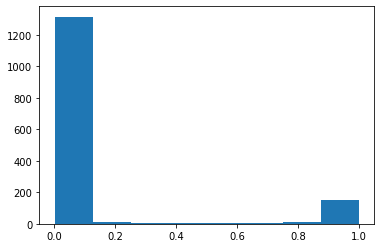

In [205]:
y_proba = clf.predict_proba(x_test)[:,1]
plt.hist(y_proba, bins=8)

### Validating Model

In [210]:
#Combine preprocessed data into one sample 
x_cros = pd.concat([x_train,x_test],axis=0)
y_cros = pd.concat([y_train,y_test],axis=0)

In [209]:
from sklearn.model_selection import cross_val_score

In [212]:
clf = xgb.XGBClassifier(seed=42, nthread=-1)
score = cross_val_score(clf, x_cros, y_cros, cv=10)
score

array([0.97804391, 0.96806387, 0.97804391, 0.972     , 0.974     ,
       0.966     , 0.974     , 0.98597194, 0.96593186, 0.98597194])

In [213]:
np.mean(score)

0.9748027448109793

### Final: model resampling (under_sample)

In [218]:
y_cros = pd.DataFrame(y_cros)

In [220]:
df_cross = pd.concat([x_cros,y_cros],axis=1)

In [222]:
# Class count
class_0, class_1 = y_cros['defClient'].value_counts()

# Divide by class
df_0 = df_cross[df_cross['defClient'] == 0]
df_1 = df_cross[df_cross['defClient'] == 1]

In [226]:
df_0_under = df_0.sample(class_1)
df_test_under = pd.concat([df_0_under, df_1], axis=0)

print('Random under-sampling:')
print(df_test_under.defClient.value_counts())

Random under-sampling:
1.0    633
0.0    633
Name: defClient, dtype: int64
